In [1]:
import tensorflow as tf

# boston_housing = tf.keras.datasets.boston_housing
# cifar10 = tf.keras.datasets.cifar100
# cifar100 = tf.keras.datasets.cifar100
fashion_mnist = tf.keras.datasets.fashion_mnist
# imdb = tf.keras.datasets.imdb
# mnist = tf.keras.datasets.mnist
# reuters = tf.keras.datasets.reuters

# 加载数据集 
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# 观察数据集图片、数据集label的shape
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

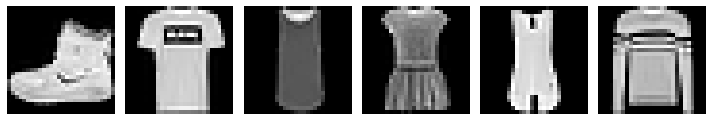

[9 0 0 3 0 2]


In [2]:
import matplotlib.pyplot as plt

def plot_image(image_arr):
    size = len(image_arr)
    fig, axes = plt.subplots(1, size, figsize=(10, 10))
    axes = axes.flatten()
    for img, ax in zip(image_arr, axes):
        ax.imshow(img, plt.cm.gray)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
        
# 观察一下图片        
plot_image(train_images[0:6])
print(train_labels[0:6])

In [3]:
# 建立模型
# input layer，将28x28的图像变成一维向量
# hidden layer，是个全连接层，神经元128个（不包含偏置单元），激活函数用relu
# output layer，是个全连接层，10对应10个输出的类别，用softmax
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
# 优化器 adam
# loss 的sparse_categorical_crossentropy用于label, 1,2,3,4,5
# loss 的categorical_crossentropy用于向量化的label，[1,0,0,0,0]...[0,0,0,0,1]
# metics 用来衡量模型，可以是正确率，精确度，交并比等
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

In [5]:
# Normalization
train_images = train_images / 255.
test_images  = test_images / 255.

# 训练的过程
# 一个epochs就是将train全部过一遍
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 19s 316us/sample - loss: 0.4915 - accuracy: 0.8280 - val_loss: 0.4441 - val_accuracy: 0.8412
Epoch 2/10
60000/60000 [==============================] - 13s 210us/sample - loss: 0.3782 - accuracy: 0.8627 - val_loss: 0.3860 - val_accuracy: 0.8608
Epoch 3/10
60000/60000 [==============================] - 12s 198us/sample - loss: 0.3382 - accuracy: 0.8768 - val_loss: 0.3619 - val_accuracy: 0.8707
Epoch 4/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.3171 - accuracy: 0.8837 - val_loss: 0.3640 - val_accuracy: 0.8679
Epoch 5/10
60000/60000 [==============================] - 13s 215us/sample - loss: 0.2960 - accuracy: 0.8907 - val_loss: 0.3499 - val_accuracy: 0.8758
Epoch 6/10
60000/60000 [==============================] - 12s 203us/sample - loss: 0.2813 - accuracy: 0.8962 - val_loss: 0.3492 - val_accuracy: 0.8756
Epoch 7/10
60000/60000 [====================

In [6]:
# 保存训练的权重
model.save_weights('./fashion_mnist/my_first_ckpt')

# 重新加载权重
# 加载权重的模型必须和训练的模型一致才能加载
model.load_weights('./fashion_mnist/my_first_ckpt')

# 加载权重就可以做测试了
loss, accuracy = model.evaluate(test_images, test_labels, verbose=2)
print('Restore model, accuracy {:%}'.format(accuracy))

10000/1 - 1s - loss: 0.2460 - accuracy: 0.8805
Restore model, accuracy 88.050002%
